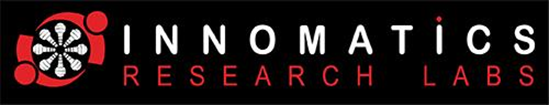

#                `` Data Collection , Data Cleaning and EDA Project``

### _Case Study Selection_

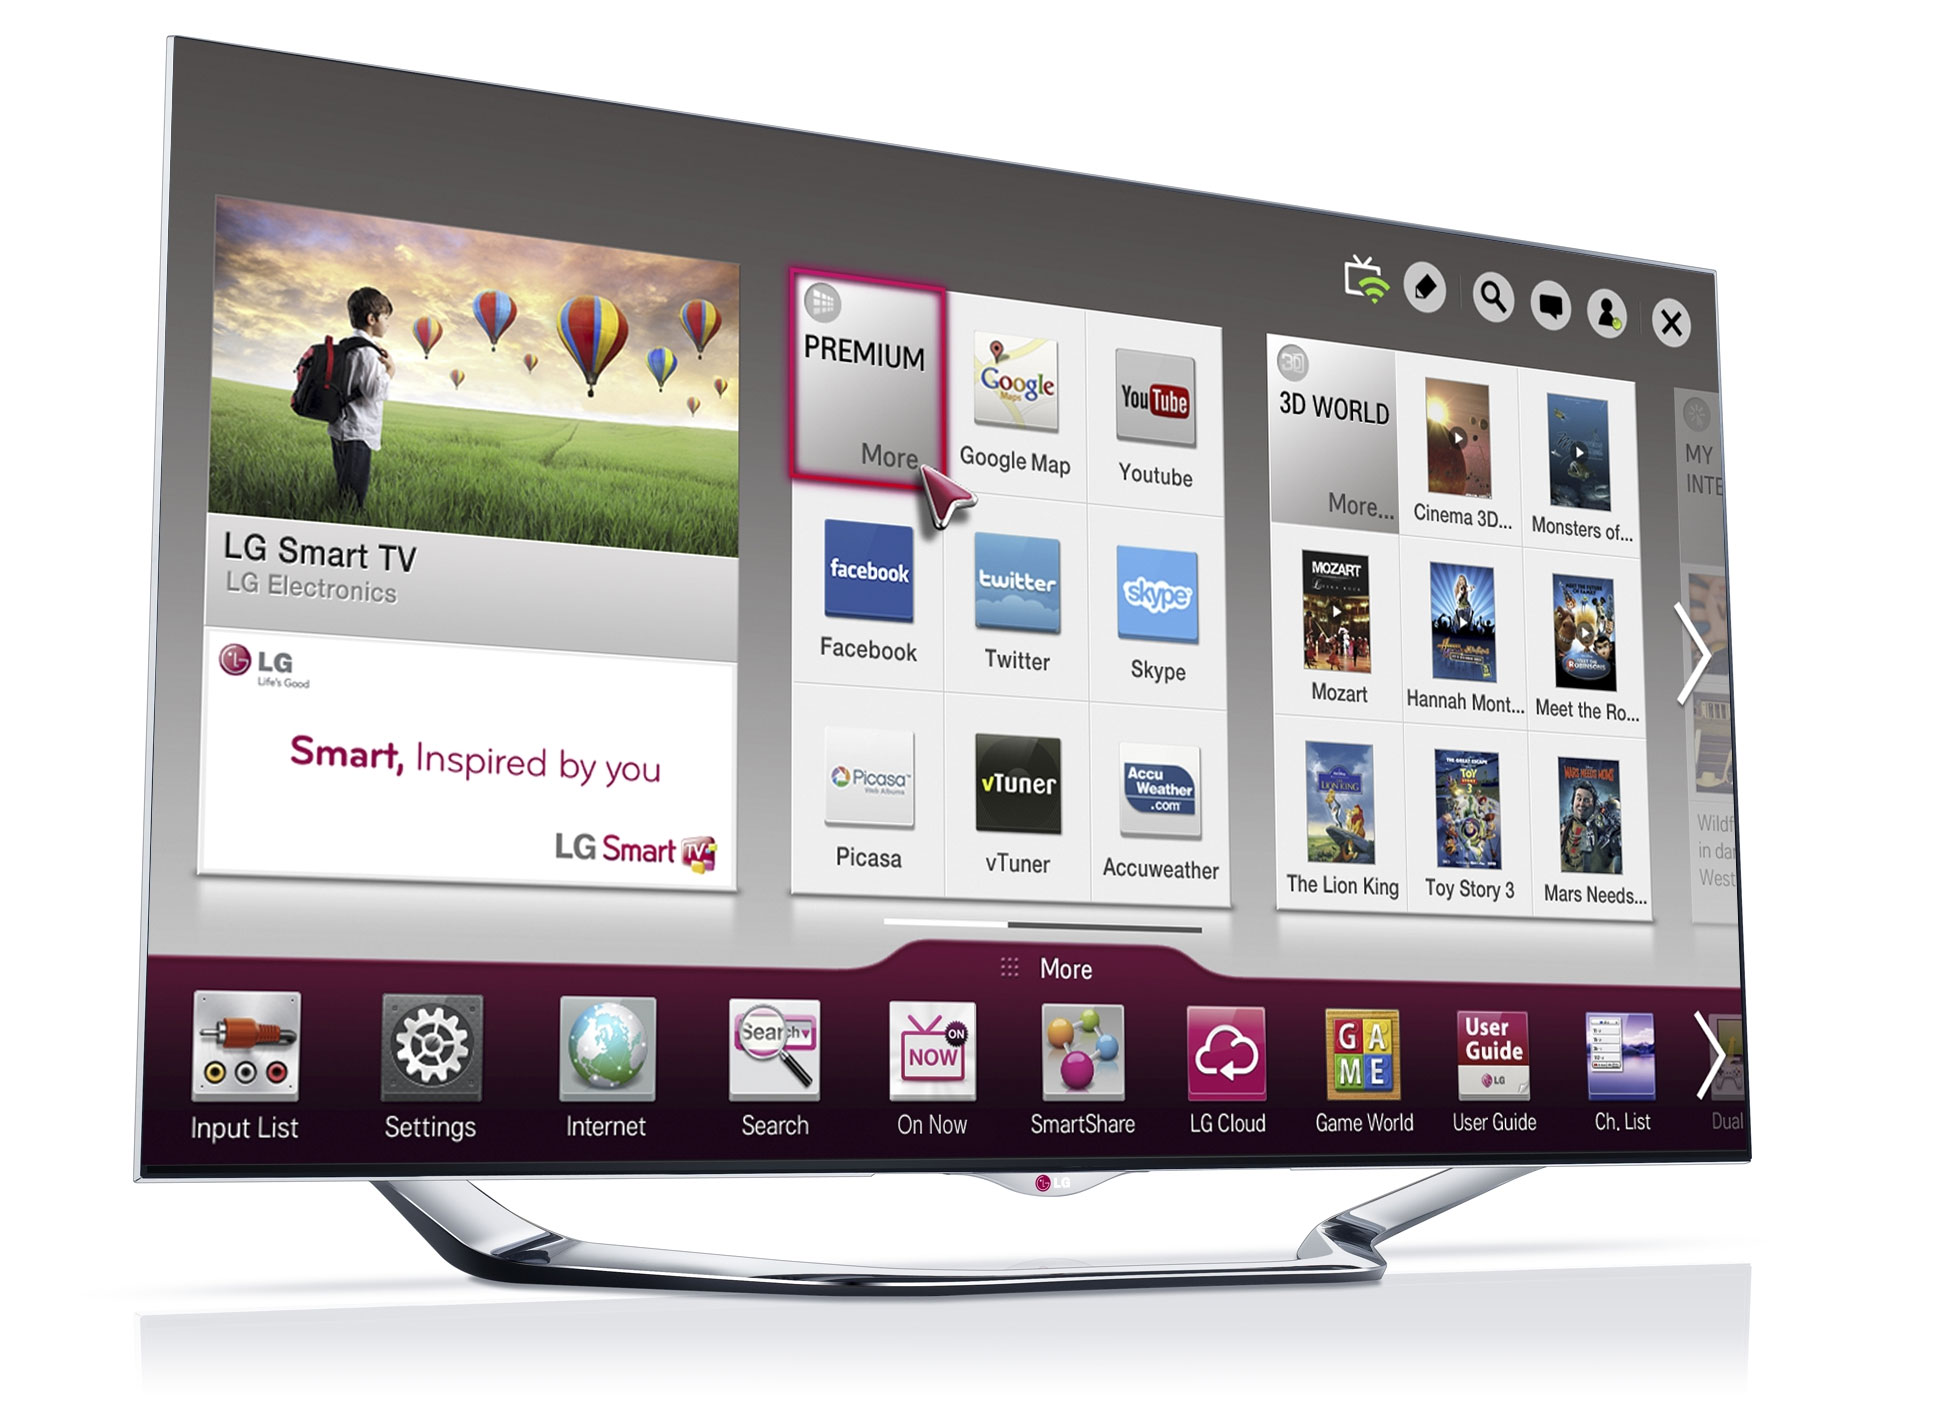

* **Project Title: Price analysis on `SMART TV'S`**
* **Use Case Domain: `Electronics`**
* **Team Size  : 2**
* **Member Names -  `@Saikiran Nune  @Ch ramesh`** 
* **Use Case Objective(Problem Statement): Analysis on price of `Smart TV's` based on there features.** 


### 2. Search for Relevant Websites 

In [ ]:
url = r'https://www.flipkart.com/search?q=tv&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_9_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_9_0_na_na_na&as-pos=9&as-type=TRENDING&suggestionId=tv&requestId=13dae110-8a35-4a3a-b198-5a7360dabfb7&page={i}'

### 3. Define the problem Statement: 

### import the Required Libraries

In [179]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

### Extract the Data

In [180]:
brand_name = []
model_name = []
Video_quality = []
length = []
prices = []
System1 = []                            #empty lists
year = []
#Prices1 = []
Ratings = []
opp = []
discount = []
opr = []
discount1 = []
riew_counts = []
ratings_counts = []
b = []

for i in range(1,31):        
    url = f'https://www.flipkart.com/search?q=tv&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_9_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_9_0_na_na_na&as-pos=9&as-type=TRENDING&suggestionId=tv&requestId=13dae110-8a35-4a3a-b198-5a7360dabfb7&page={i}'
    print(url)
    
    requests.get(url,headers = {'User-Agent':'Mozilla/5.0'})   #requests paseed to the urls

    headers = {"Accept-Language": "en-US,en;q=0.9"}

    page=requests.get(url, headers=headers)
    
    soup = BeautifulSoup(page.text)   #using Beautifulsoup library we can extract the data
    
    content = soup.find_all('div',class_ = '_4rR01T')  
    
    for i in content:
        brands = i.find('div',class_ = '_4rR01T')
        
        regex = re.findall('^\w+',i.text)
        
        if len(regex) == 1:
            brand_name.append(regex[0])
        else:
            brand_name.append(np.nan)
            
            
        #model
        
        model = re.findall('cm\s\((\d+)',i.text)
        
        if len(model) == 1:
            model_name.append(model[0])
        else:
            model_name.append(np.nan)
            
        video = re.findall('HD\s\w+\s\w+|Ultra\s\w+',i.text)  #video_quality
        
        if len(video) ==  1:
            
            Video_quality.append(video[0])
            
        else:
            
            Video_quality.append(np.nan)
            
        cm = re.findall('(\d+\.?\d+)\scm',i.text) #length
        
        if len(cm) == 1:
            
            length.append(cm[0])
        else:
            
            length.append(np.nan)
            
       
            
        op = soup.find_all('div',class_ ='_3I9_wc _27UcVY') 
        if op:
            opp.append(op[0])
        else:
            opp.append(np.nan)
            
        dis = soup.find_all('div',class_ = '_3Ay6Sb')  #discount
        if dis:
            discount.append(dis[0])
        else:
            discount.append(np.nan)
            
    content2 = soup.find_all('div',class_ = 'fMghEO')
    
    for i in content2:
        
        os = i.find('li',class_ = 'rgWa7D')       #operating system
        
        regex = re.findall('Tizen|Android|Google|WebOS|Linux|Coolita|VIDAA|Fire',i.text)
        
        if len(regex) == 1:
            
            System1.append(regex[0])
            
        else:
            
            System1.append(np.nan)
            
        ly = i.find('li',class_ = 'rgWa7D')         #launch yaer
        
        regex = re.findall('Year:\s(\d\d\d\d)',i.text)
        
        if len(regex) == 1:
            
            year.append(regex[0])
            
        else:
            
            year.append(np.nan)
            
            
    content3 = soup.find_all('div',class_ ='_2kHMtA')               #prices
    
    for i in  content3:
        
        p = i.find("div", class_="_30jeq3 _1_WHN1")
        if p:
            prices.append(p.text)
        else:
            prices.append(np.nan)
            
    content4 = soup.find_all('div',class_ ='_2kHMtA')
    
    for i in content4:
        
        op = i.find('div',class_ = '_3I9_wc _27UcVY')     #original_price
        
        if op:
            opr.append(op.text)
        else:
            opr.append(np.nan)
        
        
    content5 = soup.find_all('div',class_ ='_2kHMtA')
    
    for i in content5:
        
        dis1 = i.find('div',class_ = '_3Ay6Sb')
        
        if dis1:
            discount1.append(dis1.text)
        else:
            discount1.append(np.nan)
            
    content6 = soup.find_all('div',class_ = '_3pLy-c row')      #ratings
    for i in content6:
        rat  = i.find('div',class_ = '_3LWZlK')
        
        if rat:
            Ratings.append(rat.text)
        else:
            Ratings.append(np.nan)
            
        regex = re.findall('Ratings\s&\s(.*)Reviews',i.text)    #riew_counts
        
        if len(regex) == 1:
            riew_counts.append(regex[0])
        else:
            riew_counts.append(np.nan)
            
        regex = re.findall('(\d+\,?\d+)\sRatings',i.text)
        
        if len(regex) == 1:      #ratings_counts
            ratings_counts.append(regex[0])
        else:
            ratings_counts.append(np.nan)
            
            
    content7 = soup.find_all('div',class_ = '_4rR01T')   #brand name      
            
    for i in content7:
        b.append(i.text.split()[0])
            
        
            
        
            
            
            
            
            
       
                
            
            
            
            
            
            
        
            
    
    

https://www.flipkart.com/search?q=tv&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_9_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_9_0_na_na_na&as-pos=9&as-type=TRENDING&suggestionId=tv&requestId=13dae110-8a35-4a3a-b198-5a7360dabfb7&page=1
https://www.flipkart.com/search?q=tv&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_9_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_9_0_na_na_na&as-pos=9&as-type=TRENDING&suggestionId=tv&requestId=13dae110-8a35-4a3a-b198-5a7360dabfb7&page=2
https://www.flipkart.com/search?q=tv&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_9_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_9_0_na_na_na&as-pos=9&as-type=TRENDING&suggestionId=tv&requestId=13dae110-8a35-4a3a-b198-5a7360dabfb7&page=3
https://www.flipkart.com/search?q=tv&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_9_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_9_0_na_na_na&as-pos=9&as-type=TRENDING&suggestionId=tv&requestId=13dae110-8a35-4a3a-b198-5a7360da

#### _Cleaning the Data_

In [17]:
Original_price = [i.text for i in opp]

In [19]:
Discount = [i.text for i in discount]

In [181]:
Prices = []                # To remove'₹' character using l-Strip
for i in prices:
    Prices.append(i.lstrip('₹'))

In [182]:
opr_cleaned = [str(price).replace('₹', '') for price in opr]    #replacing (₹) - ('')with empty space

In [183]:
Prices = [i.replace(",","") for i in Prices]  # replacing (',')- ('') with empty space

In [184]:
opr_cleaned = [i.replace(",","") for i in opr_cleaned]        # replacing (',')- ('') with empty space

In [185]:
Discount = [str(i).strip('% off') for i in discount1]         # removing '% off' using strip

In [186]:
ratings_counts1 = [str(i).replace(",","") for i in ratings_counts]  # replacing (',')- ('') with empty space

In [187]:
riew_counts1 = [str(i).replace(",","") for i in riew_counts]        # replacing (',')- ('') with empty space

## ` _Create Data Frame_`

In [188]:
df = pd.DataFrame({'BRAND NAME':b,
                  'Screen size':model_name,
                  'LENGTH(cm)':length,
                  'VIDEO QUALITY':Video_quality,
                  'PRICE':Prices,
                  'ORIGINAL_PRICE':opr_cleaned,
                  'DISCOUNT':Discount,
                  'LAUNCH YEAR':year,
                  'OPERATING SYSTEM':System1,
                  'RATINGS':Ratings,
                  'NO OF RIVEWS':riew_counts1,
                  'NO OF RATINGS':ratings_counts1})       #creating DataFrame (Dictionary Format)

In [189]:
df

,BRAND NAME,Screen size,LENGTH(cm),VIDEO QUALITY,PRICE,ORIGINAL_PRICE,DISCOUNT,LAUNCH YEAR,OPERATING SYSTEM,RATINGS,NO OF RIVEWS,NO OF RATINGS
0,SAMSUNG,32,80,HD Ready LED,14990,18900,20,2022,Tizen,4.4,9993,25011
1,iFFALCON,55,139,Ultra HD,24999,73990,66,2022,Google,4.2,6398,251313
2,Mi,32,80,HD Ready LED,13499,24999,46,2023,Google,4.3,3286,339037
3,iFFALCON,43,108,Ultra HD,17999,49990,63,2022,Google,4.2,6398,251313
4,Thomson,32,80,HD Ready LED,10499,17999,41,2023,Android,4.3,24184,23568
...,...,...,...,...,...,...,...,...,...,...,...,...
715,SONY,85,215,Ultra HD,309990,599990,48,2022,Android,NaN,nan,nan
716,Coocaa,65,164,Ultra HD,45999,99999,54,2022,Google,4.4,49,4288
717,Mi,43,108,Ultra HD,26999,42999,37,2022,Android,4.3,10745,12660
718,TOSHIBA,55,139,Ultra HD,69999,84999,17,2023,VIDAA,NaN,nan,nan


### Export into.CSV format

In [190]:
df.to_csv('Smart Tv.csv')        #  TO Save the file into CSV format


### Read CSV file

In [191]:
df = pd.read_csv(r"C:\Users\saiki\python\WEBSCRAPING\smart Tv.csv")    # Read the CSV file 

In [192]:
df

,Unnamed: 0,BRAND NAME,Screen size,LENGTH(cm),VIDEO QUALITY,PRICE,ORIGINAL_PRICE,DISCOUNT,LAUNCH YEAR,OPERATING SYSTEM,RATINGS,NO OF RIVEWS,NO OF RATINGS
0,0,SAMSUNG,32.0,80.0,HD Ready LED,14990,18900.0,20.0,2022.0,Tizen,4.4,9993.0,25011.0
1,1,iFFALCON,55.0,139.0,Ultra HD,24999,73990.0,66.0,2022.0,Google,4.2,6398.0,251313.0
2,2,Mi,32.0,80.0,HD Ready LED,13499,24999.0,46.0,2023.0,Google,4.3,3286.0,339037.0
3,3,iFFALCON,43.0,108.0,Ultra HD,17999,49990.0,63.0,2022.0,Google,4.2,6398.0,251313.0
4,4,Thomson,32.0,80.0,HD Ready LED,10499,17999.0,41.0,2023.0,Android,4.3,24184.0,23568.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,715,SONY,85.0,215.0,Ultra HD,309990,599990.0,48.0,2022.0,Android,NaN,NaN,NaN
716,716,Coocaa,65.0,164.0,Ultra HD,45999,99999.0,54.0,2022.0,Google,4.4,49.0,4288.0
717,717,Mi,43.0,108.0,Ultra HD,26999,42999.0,37.0,2022.0,Android,4.3,10745.0,12660.0
718,718,TOSHIBA,55.0,139.0,Ultra HD,69999,84999.0,17.0,2023.0,VIDAA,NaN,NaN,NaN


In [61]:
df.info()        # information a bout data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        720 non-null    int64  
 1   BRAND NAME        720 non-null    object 
 2   MODEL NAME(inch)  720 non-null    int64  
 3   LENGTH(cm)        720 non-null    float64
 4   VIDEO QUALITY     718 non-null    object 
 5   PRICE             720 non-null    int64  
 6   ORIGINAL_PRICE    715 non-null    float64
 7   DISCOUNT          713 non-null    float64
 8   LAUNCH YEAR       720 non-null    int64  
 9   OPERATING SYSTEM  693 non-null    object 
 10  RATINGS           643 non-null    float64
 11  NO OF RIVEWS      650 non-null    float64
 12  NO OF RATINGS     650 non-null    float64
dtypes: float64(6), int64(4), object(3)
memory usage: 73.3+ KB


### DATA CLEANING PROCESS

In [62]:
columns = df.columns     # columns Names

In [63]:
columns

Index(['Unnamed: 0', 'BRAND NAME', 'MODEL NAME(inch)', 'LENGTH(cm)',
       'VIDEO QUALITY', 'PRICE', 'ORIGINAL_PRICE', 'DISCOUNT', 'LAUNCH YEAR',
       'OPERATING SYSTEM', 'RATINGS', 'NO OF RIVEWS', 'NO OF RATINGS'],
      dtype='object')

### _Columns_Rows_

In [64]:
Shape = df.shape       # Shape of a data set

In [65]:
print('Number of Columns:' , Shape[0])
print('Number of Rows:',Shape[1])

Number of Columns: 720
Number of Rows: 13


### _NULL VALUES_

In [193]:
import missingno   # import the library to visualize the null values

<Axes: >

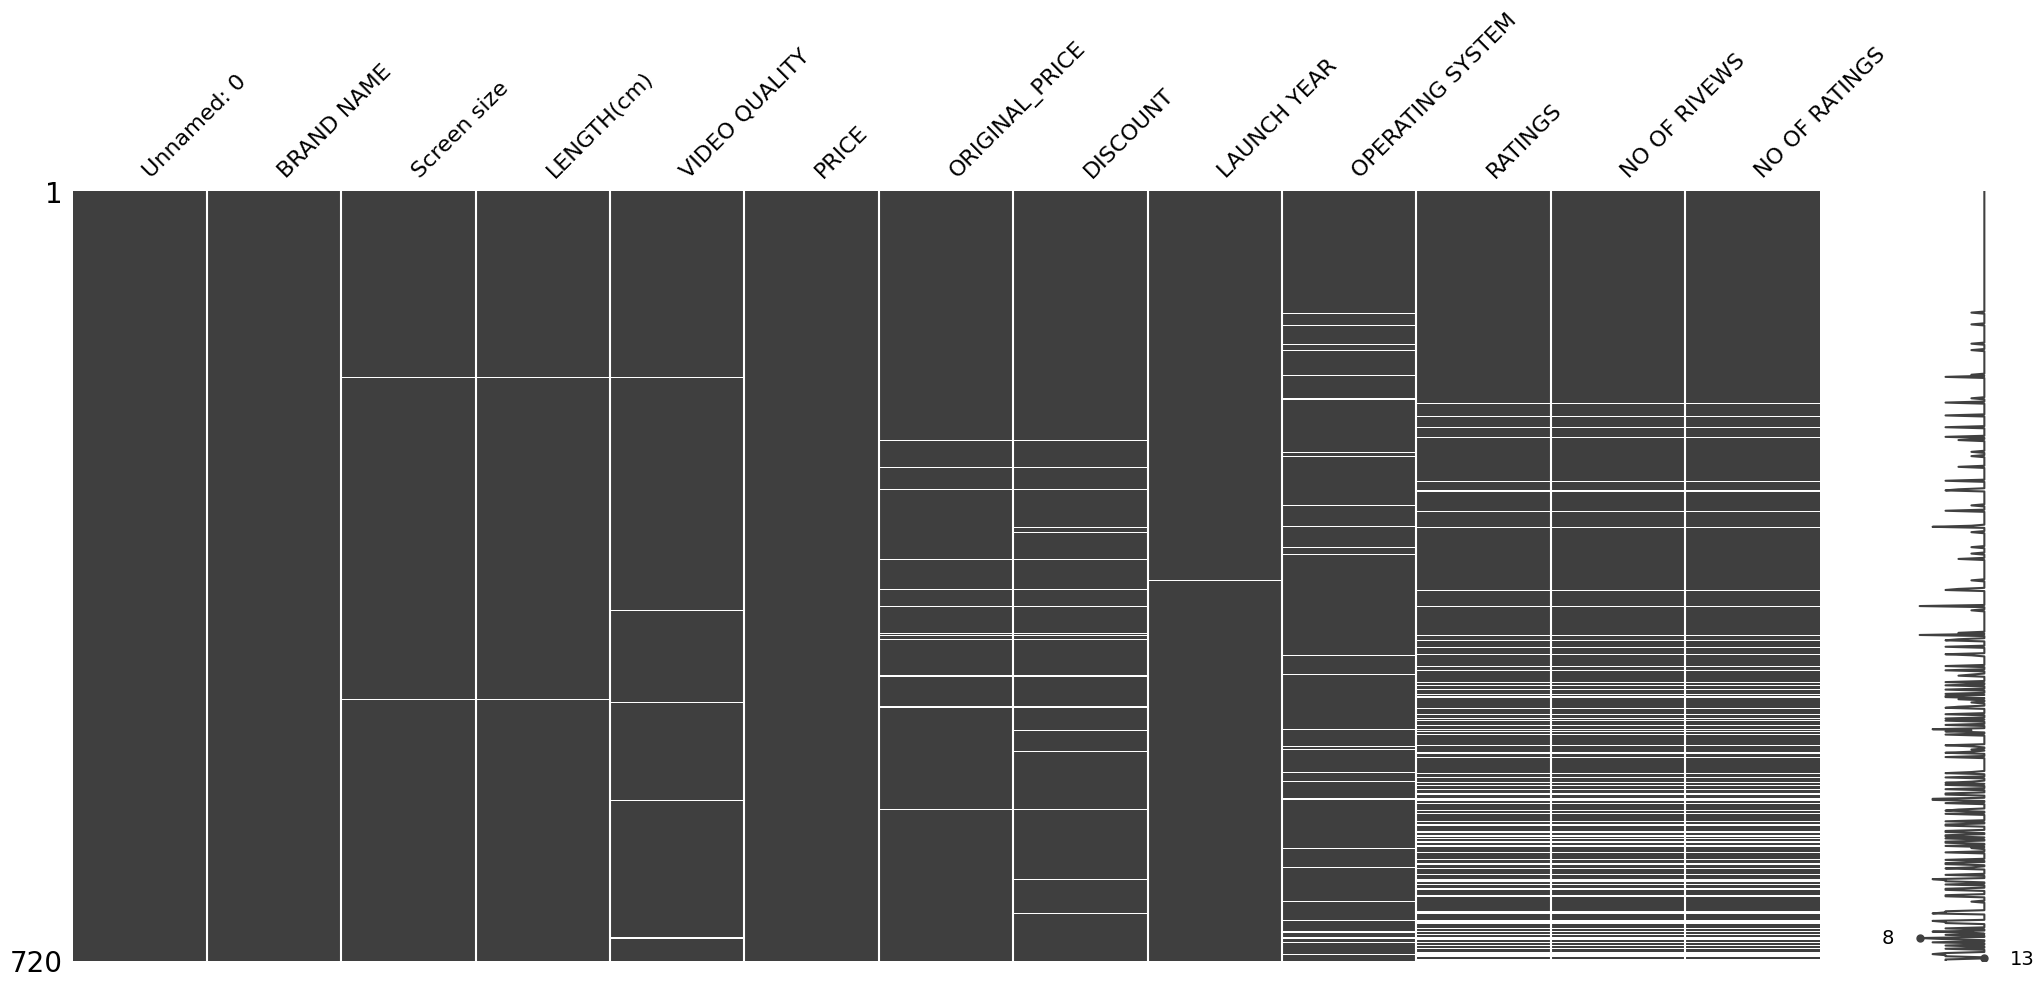

In [194]:
missingno.matrix(df)

In [195]:
df.isna().sum()       # checking null values

Unnamed: 0           0
BRAND NAME           0
Screen size          2
LENGTH(cm)           2
VIDEO QUALITY        5
PRICE                0
ORIGINAL_PRICE      12
DISCOUNT            18
LAUNCH YEAR          1
OPERATING SYSTEM    29
RATINGS             90
NO OF RIVEWS        90
NO OF RATINGS       90
dtype: int64

### _Data types_

In [99]:
df.dtypes      # Checking Data types

Unnamed: 0            int64
BRAND NAME           object
MODEL NAME(inch)      int64
LENGTH(cm)          float64
VIDEO QUALITY        object
PRICE                 int64
ORIGINAL_PRICE      float64
DISCOUNT            float64
LAUNCH YEAR           int64
OPERATING SYSTEM     object
RATINGS             float64
NO OF RIVEWS        float64
NO OF RATINGS       float64
dtype: object

### _Duplicates_

In [100]:
df

,Unnamed: 0,BRAND NAME,MODEL NAME(inch),LENGTH(cm),VIDEO QUALITY,PRICE,ORIGINAL_PRICE,DISCOUNT,LAUNCH YEAR,OPERATING SYSTEM,RATINGS,NO OF RIVEWS,NO OF RATINGS
0,0,SAMSUNG,32,80.0,HD Ready LED,22999,42999.0,46.0,2022,Tizen,4.4,117.0,31312.0
1,1,SAMSUNG,43,108.0,Ultra HD,7790,27990.0,72.0,2023,Tizen,4.4,478.0,93242.0
2,2,LG,32,80.0,HD Ready LED,14490,24990.0,42.0,2020,WebOS,4.3,827.0,39424.0
3,3,Mi,32,80.0,HD Ready LED,9999,17999.0,44.0,2023,Google,4.3,24083.0,23015.0
4,4,Thomson,32,80.0,HD Ready LED,12490,24999.0,50.0,2023,Android,4.3,3237.0,338471.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,715,SONY,55,139.0,Ultra HD,24590,26999.0,8.0,2022,Google,NaN,NaN,NaN
716,716,Blaupunkt,50,126.0,Ultra HD,31999,44999.0,28.0,2023,Google,4.5,10715.0,12400.0
717,717,KODAK,55,139.0,Ultra HD,22999,29999.0,23.0,2022,Google,4.6,3237.0,338471.0
718,718,SAMSUNG,55,138.0,Ultra HD,36490,54990.0,33.0,2021,Tizen,3.3,NaN,NaN


In [196]:
df.duplicated().sum()  #checking duplicate values

0

In [197]:
df.drop_duplicates(keep='first',inplace=True,ignore_index=True)     # Dropping the duplicate values

In [198]:
df

,Unnamed: 0,BRAND NAME,Screen size,LENGTH(cm),VIDEO QUALITY,PRICE,ORIGINAL_PRICE,DISCOUNT,LAUNCH YEAR,OPERATING SYSTEM,RATINGS,NO OF RIVEWS,NO OF RATINGS
0,0,SAMSUNG,32.0,80.0,HD Ready LED,14990,18900.0,20.0,2022.0,Tizen,4.4,9993.0,25011.0
1,1,iFFALCON,55.0,139.0,Ultra HD,24999,73990.0,66.0,2022.0,Google,4.2,6398.0,251313.0
2,2,Mi,32.0,80.0,HD Ready LED,13499,24999.0,46.0,2023.0,Google,4.3,3286.0,339037.0
3,3,iFFALCON,43.0,108.0,Ultra HD,17999,49990.0,63.0,2022.0,Google,4.2,6398.0,251313.0
4,4,Thomson,32.0,80.0,HD Ready LED,10499,17999.0,41.0,2023.0,Android,4.3,24184.0,23568.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,715,SONY,85.0,215.0,Ultra HD,309990,599990.0,48.0,2022.0,Android,NaN,NaN,NaN
716,716,Coocaa,65.0,164.0,Ultra HD,45999,99999.0,54.0,2022.0,Google,4.4,49.0,4288.0
717,717,Mi,43.0,108.0,Ultra HD,26999,42999.0,37.0,2022.0,Android,4.3,10745.0,12660.0
718,718,TOSHIBA,55.0,139.0,Ultra HD,69999,84999.0,17.0,2023.0,VIDAA,NaN,NaN,NaN


In [199]:
df.columns

Index(['Unnamed: 0', 'BRAND NAME', 'Screen size', 'LENGTH(cm)',
       'VIDEO QUALITY', 'PRICE', 'ORIGINAL_PRICE', 'DISCOUNT', 'LAUNCH YEAR',
       'OPERATING SYSTEM', 'RATINGS', 'NO OF RIVEWS', 'NO OF RATINGS'],
      dtype='object')

In [200]:
df.dtypes

Unnamed: 0            int64
BRAND NAME           object
Screen size         float64
LENGTH(cm)          float64
VIDEO QUALITY        object
PRICE                 int64
ORIGINAL_PRICE      float64
DISCOUNT            float64
LAUNCH YEAR         float64
OPERATING SYSTEM     object
RATINGS             float64
NO OF RIVEWS        float64
NO OF RATINGS       float64
dtype: object

### Checking the  `_Noisy_Data_`

In [201]:
df['BRAND NAME'].unique()        # checking the Noisy data each and evry column 

array(['SAMSUNG', 'iFFALCON', 'Mi', 'Thomson', 'LG', 'Acer', 'REDMI',
       'Hisense', 'SONY', 'MOTOROLA', 'Panasonic', 'TOSHIBA', 'Infinix',
       'Coocaa', 'KODAK', 'TCL', 'XElectron', 'Blaupunkt', 'Vu', 'MarQ',
       'Foxsky', 'Sansui', 'InnoQ', 'ONIDA', 'Compaq', 'CANDY',
       'BeethoSOL', 'SENS', 'OnePlus', 'realme', 'SKYTRON', 'Lloyd',
       'Haier', 'RGL', 'IMPEX', 'LEEMA', 'NU', 'DETEL', 'PHILIPS',
       'INVANTER', 'TRUSENSE', 'Aiwa', 'ZEBRONICS', 'Dyanora', 'BPL',
       'V-SKY', 'CORNEA', 'Hyundai', 'VG', 'AISEN', 'iMEE'], dtype=object)

In [203]:
df.columns

Index(['Unnamed: 0', 'BRAND NAME', 'Screen size', 'LENGTH(cm)',
       'VIDEO QUALITY', 'PRICE', 'ORIGINAL_PRICE', 'DISCOUNT', 'LAUNCH YEAR',
       'OPERATING SYSTEM', 'RATINGS', 'NO OF RIVEWS', 'NO OF RATINGS'],
      dtype='object')

In [204]:
df['Screen size'].unique()

array([32., 55., 43., 40., 24., 50., 65., 42., 75., nan, 86., 48., 49.,
       58., 85., 77., 70.])

In [205]:
df['LENGTH(cm)'].unique()

array([ 80.  , 139.  , 108.  , 102.  ,  60.  , 127.  , 125.  , 140.  ,
       109.  , 100.  , 101.  , 138.  , 126.  , 164.  ,  79.97, 163.  ,
       138.8 , 163.9 , 106.  , 189.  ,  80.01,  80.04, 165.  ,    nan,
       218.  , 125.7 , 121.  , 124.  , 146.  , 123.  , 189.34,  98.  ,
       139.7 , 214.  , 190.  , 165.1 , 144.8 , 194.7 ,  82.  , 163.8 ,
       190.5 , 178.  , 109.22, 215.  ])

In [206]:
df['VIDEO QUALITY'].unique()

array(['HD Ready LED', 'Ultra HD', 'HD LED Smart', 'HD Ready Smart',
       'HD Ready 3D', nan], dtype=object)

In [207]:
df['PRICE'].unique()

array([ 14990,  24999,  13499,  17999,  10499,  15490,  31990,  16999,
        28990,   6299,  16990,  30990,  12999,  26999,  27999,  32999,
        40999,  21999,  18999,   8499,  31999,  30999,  13999,  26990,
        22999,  20989,  15990,  34999,  17499,  23999,  39999,  15999,
        37999,   8999,  46990,  29999,  45999,  33999,  36999,  32990,
         9499,  43990,  45990,  14999,  35999,  44999,   7999,  28999,
        67990,  52490,  41999,  29499,   7799,   9999,  57999,  75999,
        19999,  10299,  56999,   5499,  11999,  79999,  49999,  20499,
         5999,  25999,   8299,  12490,  87990,  23990,  14499,  24990,
       129999,  18370,  42990,  54850,   6999, 144990,  84999,  69990,
        15499,  55990,   7749,  42999,  10999,  12499,  20999,  55999,
        94990,   5555,  79990,   7815, 125900,  64900,  74890,  12990,
        48990,  99999, 169990,  25919,  35990,  64990, 119990,  51999,
       159990, 288139,  48818,  46999,  56990,  97990,  99990, 469900,
      

In [208]:
df['ORIGINAL_PRICE'].unique()

array([ 18900.,  73990.,  24999.,  49990.,  17999.,  24990.,  54900.,
        29999.,  47900.,   9999.,  19990.,  52900.,  49999.,  42999.,
        46999.,  44999.,  59900.,  31999.,  32999.,  14999., 119980.,
        59999.,  23999.,  37900.,  20990.,  69999.,  35999.,  38990.,
        69900.,  16999.,  27990.,  54990.,  72900.,  54999.,  99999.,
       119900.,  18999.,  14499.,  69990.,  71990., 114990.,  26999.,
        33999.,  59990., 121990.,  36990., 109900.,  99900.,  30000.,
        21000.,  41999.,  51999.,  55000., 139900.,  37000.,  19499.,
        28499., 112990.,  12999.,  20000., 256990., 164990.,  23990.,
        70900.,  40000.,  56790.,  39990.,  60990.,  34900.,  14990.,
        35990., 144900.,  34990., 140580.,  25999.,  66990.,  15999.,
        48990.,  52990.,  48999.,  45990., 230400.,  29290.,  62990.,
        19999.,  79990.,  39999., 299990.,  34999., 149999., 124900.,
        30990.,  22999.,  91900.,  89999.,  21490.,  84999.,  38499.,
           nan,  350

In [209]:
df['DISCOUNT'].unique()

array([20., 66., 46., 63., 41., 38., 43., 39., 37., 15., 48., 34., 26.,
       31., 42., 73., 28., 53., 30., 23., 50., 33., 58., 45., 47., 62.,
       69., 35., 40., 54., 71., 55., 36., 70., 44., 32., 61., 78., 51.,
       22., 57., 68., 49., 25., 60., 65., 52., 67., 64., 19., 29., nan,
       27., 16., 59., 21., 10., 18.,  3.,  8., 12., 17., 14.])

In [210]:
df['LAUNCH YEAR'].unique()

array([2022., 2023., 2020., 2021., 2018., 2017., 2024., 2016., 2019.,
         nan])

In [211]:
df['OPERATING SYSTEM'].unique()

array(['Tizen', 'Google', 'Android', 'WebOS', 'Linux', 'Fire', 'VIDAA',
       'Coolita', nan], dtype=object)

In [212]:
df.columns

Index(['Unnamed: 0', 'BRAND NAME', 'Screen size', 'LENGTH(cm)',
       'VIDEO QUALITY', 'PRICE', 'ORIGINAL_PRICE', 'DISCOUNT', 'LAUNCH YEAR',
       'OPERATING SYSTEM', 'RATINGS', 'NO OF RIVEWS', 'NO OF RATINGS'],
      dtype='object')

In [213]:
df['RATINGS'].unique()

array([4.4, 4.2, 4.3, 4.6, 4.5, 4.1, 4. , 4.7, 3.8, 3.9, nan, 4.8, 5. ,
       3.5, 3. , 3.6, 4.9, 3.7])

In [214]:
df['NO OF RIVEWS'].unique()

array([9.9930e+03, 6.3980e+03, 3.2860e+03, 2.4184e+04, 8.4000e+02,
       4.4660e+03, 4.1900e+03, 4.7440e+03, 2.0930e+03, 1.3400e+02,
       1.0745e+04, 6.8600e+02, 6.1900e+02, 2.1900e+03, 8.3000e+01,
       5.1000e+02, 1.2000e+02, 5.5000e+01, 3.1500e+02, 4.5800e+02,
       2.0300e+02, 3.2290e+03, 5.2560e+03, 1.4900e+02, 5.7400e+02,
       4.9000e+01, 2.1100e+02, 8.1000e+01, 2.6960e+03, 2.7200e+02,
       7.3000e+01, 2.4200e+02, 6.9000e+01, 1.3160e+03, 2.7740e+03,
       7.0000e+01, 2.4480e+03, 8.2100e+02, 4.7200e+02, 9.1460e+03,
       3.6100e+02, 2.4290e+03, 1.1050e+03, 2.0000e+01, 6.3770e+03,
       4.5700e+02, 3.1930e+03, 7.3900e+02, 9.5030e+03, 6.0300e+02,
       2.3000e+01, 1.9090e+03, 1.8700e+02, 2.3900e+02, 4.7000e+02,
       6.3900e+02, 4.4500e+02, 8.5710e+03, 4.8100e+02, 2.2300e+02,
       1.3500e+02, 1.5000e+02, 2.5260e+03, 6.3500e+02, 4.7469e+04,
       1.0800e+02, 1.1880e+03, 4.9000e+02, 9.8000e+01, 2.1800e+02,
              nan, 7.9000e+01, 5.3000e+02, 9.6000e+01, 2.1500e

In [215]:
df['NO OF RATINGS'].unique()

array([2.50110e+04, 2.51313e+05, 3.39037e+05, 2.35680e+04, 3.96400e+04,
       4.44150e+05, 3.31621e+05, 4.30786e+05, 3.22417e+05, 3.15750e+04,
       1.26600e+04, 3.46030e+04, 6.31470e+04, 5.99610e+04, 1.82800e+03,
       3.45290e+04, 2.90200e+03, 4.74200e+03, 3.25160e+04, 2.23500e+04,
       4.91200e+03, 6.16714e+05, 2.45470e+05, 2.77600e+03, 6.27690e+04,
       4.28800e+03, 2.15110e+04, 4.60000e+03, 4.25048e+05, 1.23570e+04,
       3.27300e+03, 2.17100e+04, 4.35200e+03, 6.50960e+04, 3.27529e+05,
       2.52000e+03, 2.18365e+05, 3.63060e+04, 2.27080e+04, 5.37366e+05,
       2.30940e+04, 4.13622e+05, 1.76760e+04, 7.90000e+02, 5.22468e+05,
       2.40740e+04, 4.14504e+05, 3.51490e+04, 4.45971e+05, 8.50600e+03,
       1.62540e+04, 8.31400e+03, 1.18370e+04, 3.88190e+04, 2.19290e+04,
       1.17280e+04, 2.42700e+04, 2.49490e+04, 6.24580e+04, 1.61362e+05,
       9.32660e+04, 2.18200e+04, 1.76100e+03, 3.18540e+04, 1.16760e+05,
       2.42200e+04, 7.37710e+04, 1.98800e+03, 3.85670e+04, 3.656

### _Identifying Outliers_

* **To find out the outliers in each contiouns data.**

<Axes: >

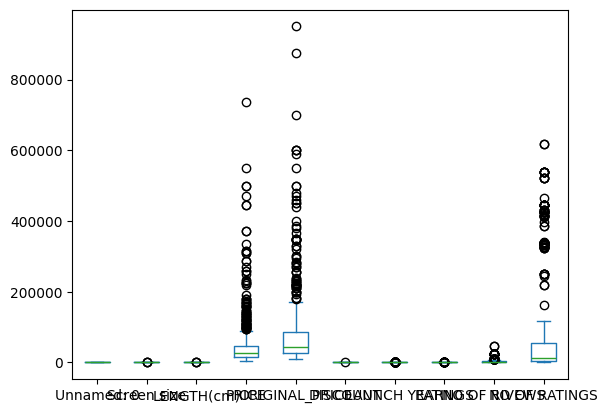

In [216]:
df.plot(kind = 'box')    # To find out the outliers

<Axes: >

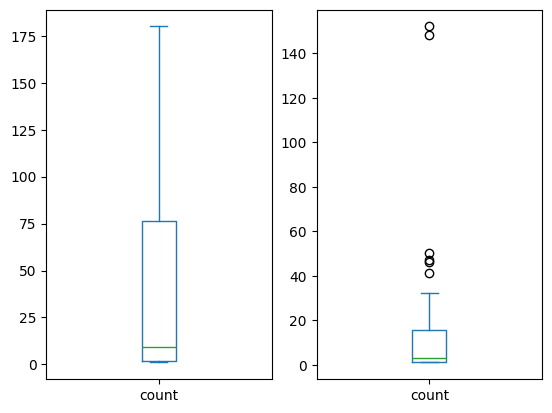

In [218]:
plt.subplot(1,2,1)
df['Screen size'].value_counts().plot(kind = 'box')
plt.subplot(1,2,2)
df['LENGTH(cm)'].value_counts().plot(kind = 'box')

<Axes: >

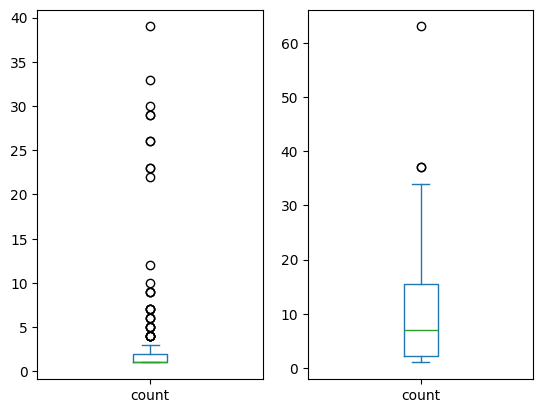

In [219]:
plt.subplot(1,2,1)
df['ORIGINAL_PRICE'].value_counts().plot(kind = 'box')
plt.subplot(1,2,2)
df['DISCOUNT'].value_counts().plot(kind = 'box')

<Axes: >

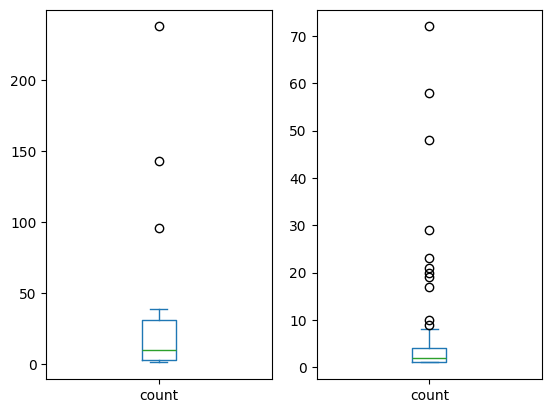

In [220]:
plt.subplot(1,2,1)
df['RATINGS'].value_counts().plot(kind = 'box')
plt.subplot(1,2,2)
df['NO OF RIVEWS'].value_counts().plot(kind = 'box')

<Axes: >

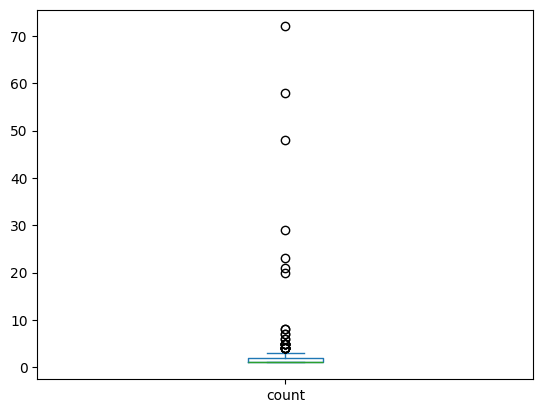

In [221]:
df['NO OF RATINGS'].value_counts().plot(kind = 'box')

### _Filling Null Values_

In [223]:
df.isna().sum()

Unnamed: 0           0
BRAND NAME           0
Screen size          2
LENGTH(cm)           2
VIDEO QUALITY        5
PRICE                0
ORIGINAL_PRICE      12
DISCOUNT            18
LAUNCH YEAR          1
OPERATING SYSTEM    29
RATINGS             90
NO OF RIVEWS        90
NO OF RATINGS       90
dtype: int64

In [224]:
df['VIDEO QUALITY'].mode()[0]

'Ultra HD'

In [225]:
df['VIDEO QUALITY'] = df['VIDEO QUALITY'].fillna(df['VIDEO QUALITY'].mode()[0])  # filling null values with using 'fillna' function

In [226]:
df['ORIGINAL_PRICE'].median()

44999.0

In [227]:
df['ORIGINAL_PRICE'] = df['ORIGINAL_PRICE'].fillna(df['ORIGINAL_PRICE'].median())  # filling null values with using 'fillna' function

In [228]:
df['ORIGINAL_PRICE'].isna().sum()

0

In [229]:
df['DISCOUNT'].median()

39.0

In [230]:
df['DISCOUNT'] = df['DISCOUNT'].fillna(df['DISCOUNT'].median())    # filling null values with using 'fillna' function

In [231]:
df['DISCOUNT'].isna().sum()

0

In [232]:
df['OPERATING SYSTEM'].mode()[0]

'Google'

In [233]:
df['OPERATING SYSTEM'] = df['OPERATING SYSTEM'].fillna(df['OPERATING SYSTEM'].mode()[0])    # filling null values with using 'fillna' function

In [234]:
df['OPERATING SYSTEM'].isna().sum()

0

In [235]:
df['RATINGS'].median()

4.3

In [236]:
df['RATINGS'] = df['RATINGS'].fillna(df['RATINGS'].median())    # filling null values with using 'fillna' function

In [237]:
df['RATINGS'].isna().sum()

0

In [238]:
df['NO OF RIVEWS'].median()

458.0

In [239]:
df['NO OF RIVEWS'] = df['NO OF RIVEWS'].fillna(df['NO OF RIVEWS'].median())  # filling null values with using 'fillna' function

In [240]:
df['NO OF RIVEWS'].isna().sum()

0

In [241]:
df['NO OF RATINGS'].median()

12660.0

In [242]:
df['NO OF RATINGS'] = df['NO OF RATINGS'].fillna(df['NO OF RATINGS'].median())  # filling null values with using 'fillna' function

In [243]:
df['NO OF RATINGS'].isna().sum()

0

In [247]:
df['Screen size'] = df['Screen size'].fillna(df['Screen size'].median())

In [248]:
df['LENGTH(cm)'] = df['LENGTH(cm)'].fillna(df['LENGTH(cm)'].median())

In [250]:
df['LAUNCH YEAR'].mode()[0]

2023.0

In [251]:
df['LAUNCH YEAR'] = df['LAUNCH YEAR'].fillna(df['LAUNCH YEAR'].mode()[0])

In [252]:
df.isna().sum() #checking null values wheather it is filled or nota

Unnamed: 0          0
BRAND NAME          0
Screen size         0
LENGTH(cm)          0
VIDEO QUALITY       0
PRICE               0
ORIGINAL_PRICE      0
DISCOUNT            0
LAUNCH YEAR         0
OPERATING SYSTEM    0
RATINGS             0
NO OF RIVEWS        0
NO OF RATINGS       0
dtype: int64

In [253]:
df.dtypes

Unnamed: 0            int64
BRAND NAME           object
Screen size         float64
LENGTH(cm)          float64
VIDEO QUALITY        object
PRICE                 int64
ORIGINAL_PRICE      float64
DISCOUNT            float64
LAUNCH YEAR         float64
OPERATING SYSTEM     object
RATINGS             float64
NO OF RIVEWS        float64
NO OF RATINGS       float64
dtype: object

### _Remove Duplicates_

In [254]:
df.duplicated().sum()      # Removing the duplicates

0

In [255]:
df.drop_duplicates(keep='first',inplace=True)  # dropping the duplicates using 'drop_duplicates function'

In [256]:
df

,Unnamed: 0,BRAND NAME,Screen size,LENGTH(cm),VIDEO QUALITY,PRICE,ORIGINAL_PRICE,DISCOUNT,LAUNCH YEAR,OPERATING SYSTEM,RATINGS,NO OF RIVEWS,NO OF RATINGS
0,0,SAMSUNG,32.0,80.0,HD Ready LED,14990,18900.0,20.0,2022.0,Tizen,4.4,9993.0,25011.0
1,1,iFFALCON,55.0,139.0,Ultra HD,24999,73990.0,66.0,2022.0,Google,4.2,6398.0,251313.0
2,2,Mi,32.0,80.0,HD Ready LED,13499,24999.0,46.0,2023.0,Google,4.3,3286.0,339037.0
3,3,iFFALCON,43.0,108.0,Ultra HD,17999,49990.0,63.0,2022.0,Google,4.2,6398.0,251313.0
4,4,Thomson,32.0,80.0,HD Ready LED,10499,17999.0,41.0,2023.0,Android,4.3,24184.0,23568.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,715,SONY,85.0,215.0,Ultra HD,309990,599990.0,48.0,2022.0,Android,4.3,458.0,12660.0
716,716,Coocaa,65.0,164.0,Ultra HD,45999,99999.0,54.0,2022.0,Google,4.4,49.0,4288.0
717,717,Mi,43.0,108.0,Ultra HD,26999,42999.0,37.0,2022.0,Android,4.3,10745.0,12660.0
718,718,TOSHIBA,55.0,139.0,Ultra HD,69999,84999.0,17.0,2023.0,VIDAA,4.3,458.0,12660.0


In [257]:
df.duplicated().sum()

0

### _Type Casting_

In [258]:
df.dtypes       # To check the data types of a columns

Unnamed: 0            int64
BRAND NAME           object
Screen size         float64
LENGTH(cm)          float64
VIDEO QUALITY        object
PRICE                 int64
ORIGINAL_PRICE      float64
DISCOUNT            float64
LAUNCH YEAR         float64
OPERATING SYSTEM     object
RATINGS             float64
NO OF RIVEWS        float64
NO OF RATINGS       float64
dtype: object

### Type Casting   -  `To convert the datatype into correct format by using Type Casting`

In [259]:
df['ORIGINAL_PRICE'] = df['ORIGINAL_PRICE'].astype('int64')  # to convert the float64 datatype to int64 datatype

In [260]:
df['DISCOUNT'] = df['DISCOUNT'].astype('int64')     # to convert the float64 datatype to int64 datatype

In [261]:
df['NO OF RIVEWS'] = df['NO OF RIVEWS'].astype('int64')    # to convert the float64 datatype to int64  datatype

In [262]:
df['NO OF RATINGS'] = df['NO OF RATINGS'].astype('int64')  # to convert the float64 datatype to int64 datatype

In [267]:
df['LAUNCH YEAR'] = df['LAUNCH YEAR'].astype('int64')

In [268]:
df.dtypes

BRAND NAME           object
Screen size         float64
LENGTH(cm)          float64
VIDEO QUALITY        object
PRICE                 int64
ORIGINAL_PRICE        int64
DISCOUNT              int64
LAUNCH YEAR           int64
OPERATING SYSTEM     object
RATINGS             float64
NO OF RIVEWS          int64
NO OF RATINGS         int64
dtype: object

In [269]:
df

,BRAND NAME,Screen size,LENGTH(cm),VIDEO QUALITY,PRICE,ORIGINAL_PRICE,DISCOUNT,LAUNCH YEAR,OPERATING SYSTEM,RATINGS,NO OF RIVEWS,NO OF RATINGS
0,SAMSUNG,32.0,80.0,HD Ready LED,14990,18900,20,2022,Tizen,4.4,9993,25011
1,iFFALCON,55.0,139.0,Ultra HD,24999,73990,66,2022,Google,4.2,6398,251313
2,Mi,32.0,80.0,HD Ready LED,13499,24999,46,2023,Google,4.3,3286,339037
3,iFFALCON,43.0,108.0,Ultra HD,17999,49990,63,2022,Google,4.2,6398,251313
4,Thomson,32.0,80.0,HD Ready LED,10499,17999,41,2023,Android,4.3,24184,23568
...,...,...,...,...,...,...,...,...,...,...,...,...
715,SONY,85.0,215.0,Ultra HD,309990,599990,48,2022,Android,4.3,458,12660
716,Coocaa,65.0,164.0,Ultra HD,45999,99999,54,2022,Google,4.4,49,4288
717,Mi,43.0,108.0,Ultra HD,26999,42999,37,2022,Android,4.3,10745,12660
718,TOSHIBA,55.0,139.0,Ultra HD,69999,84999,17,2023,VIDAA,4.3,458,12660


In [271]:
df[df['VIDEO QUALITY'] == 'HD READY SMART']

,BRAND NAME,Screen size,LENGTH(cm),VIDEO QUALITY,PRICE,ORIGINAL_PRICE,DISCOUNT,LAUNCH YEAR,OPERATING SYSTEM,RATINGS,NO OF RIVEWS,NO OF RATINGS


### Dropping the Unwanted columns

In [265]:
df.drop(columns='Unnamed: 0',inplace=True)

In [266]:
df

,BRAND NAME,Screen size,LENGTH(cm),VIDEO QUALITY,PRICE,ORIGINAL_PRICE,DISCOUNT,LAUNCH YEAR,OPERATING SYSTEM,RATINGS,NO OF RIVEWS,NO OF RATINGS
0,SAMSUNG,32.0,80.0,HD Ready LED,14990,18900,20,2022.0,Tizen,4.4,9993,25011
1,iFFALCON,55.0,139.0,Ultra HD,24999,73990,66,2022.0,Google,4.2,6398,251313
2,Mi,32.0,80.0,HD Ready LED,13499,24999,46,2023.0,Google,4.3,3286,339037
3,iFFALCON,43.0,108.0,Ultra HD,17999,49990,63,2022.0,Google,4.2,6398,251313
4,Thomson,32.0,80.0,HD Ready LED,10499,17999,41,2023.0,Android,4.3,24184,23568
...,...,...,...,...,...,...,...,...,...,...,...,...
715,SONY,85.0,215.0,Ultra HD,309990,599990,48,2022.0,Android,4.3,458,12660
716,Coocaa,65.0,164.0,Ultra HD,45999,99999,54,2022.0,Google,4.4,49,4288
717,Mi,43.0,108.0,Ultra HD,26999,42999,37,2022.0,Android,4.3,10745,12660
718,TOSHIBA,55.0,139.0,Ultra HD,69999,84999,17,2023.0,VIDAA,4.3,458,12660


In [177]:
df[(df['MODEL NAME(inch)'] == 43)&(df['OPERATING SYSTEM'] == 'Android')]

,BRAND NAME,MODEL NAME(inch),LENGTH(cm),VIDEO QUALITY,PRICE,ORIGINAL_PRICE,DISCOUNT,LAUNCH YEAR,OPERATING SYSTEM,RATINGS,NO OF RIVEWS,NO OF RATINGS
5,REDMI,43,108.0,Ultra HD,29990,54900,45,2023,Android,4.3,4435,443791
30,REDMI,43,108.0,Ultra HD,32490,47990,32,2023,Android,4.3,117,41147
34,Thomson,43,108.0,HD LED Smart,9999,18999,47,2023,Android,4.3,1092,17594
56,REDMI,43,108.0,Ultra HD,22999,29999,23,2023,Android,4.3,3237,338471
71,Mi,43,108.0,Ultra HD,9999,19999,50,2022,Android,4.3,88,3450
...,...,...,...,...,...,...,...,...,...,...,...,...
663,Candes,43,108.0,Ultra HD,37827,49990,24,2022,Android,4.1,2,421
680,REDMI,43,108.0,Ultra HD,31999,44999,28,2023,Android,4.3,10715,12400
688,INVANTER,43,108.0,Ultra HD,68900,68990,42,2023,Android,4.3,943,56155
700,REDMI,43,108.0,Ultra HD,18999,37000,48,2023,Android,4.3,442,23946


### _IT'S TIME  TO VISUALIZE THE DATA_

##  `Uni-Variate Analysis`

**continous**
* Histogram,
* Denisty plot,
* Box plot,
* Line chart

In [377]:
df.columns

Index(['BRAND NAME', 'MODEL NAME(inch)', 'LENGTH(cm)', 'VIDEO QUALITY',
       'PRICE', 'ORIGINAL_PRICE', 'DISCOUNT', 'LAUNCH YEAR',
       'OPERATING SYSTEM'],
      dtype='object')

### Histogram

* **To check the distribution of the Data**

<Axes: xlabel='PRICE', ylabel='Count'>

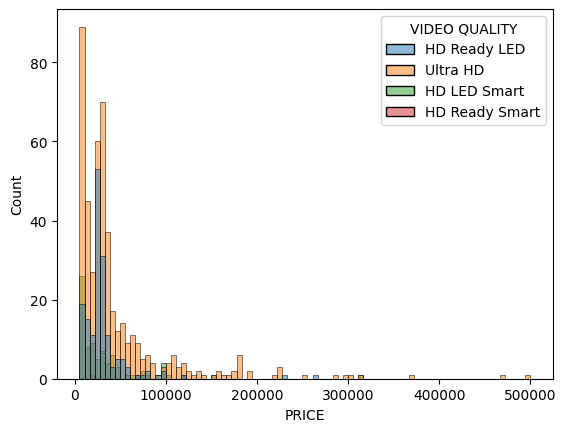

In [209]:
sns.histplot(data = df,x = 'PRICE',hue='VIDEO QUALITY')

**`Insights`**    --

* **Most of the `Smart TV's'` prices  Range from 5K to 1 LAKH.**

* **In our dataset there is a less number of Smart tv prices from 3LAKH to 5LAKH.**

* **As seen in this plot , The majority of `Video Quality` of Smart Tv is `ULTRA HD`**

* **The highest value count in price is around `90` and the lowest is `2`.**

* **There is no frequency(count) from  around (3.1lakh - 3.7lakh) and (4lakh - 4.5lakh).**

In [101]:
df.columns

Index(['BRAND NAME', 'MODEL NAME(inch)', 'LENGTH(cm)', 'VIDEO QUALITY',
       'PRICE', 'ORIGINAL_PRICE', 'DISCOUNT', 'LAUNCH YEAR',
       'OPERATING SYSTEM', 'RATINGS', 'NO OF RIVEWS', 'NO OF RATINGS'],
      dtype='object')

C:\Users\saiki\AppData\Local\Temp\ipykernel_30444\1659825100.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = df, x = 'RATINGS',hue = 'OPERATING SYSTEM')


<Axes: xlabel='RATINGS', ylabel='Density'>

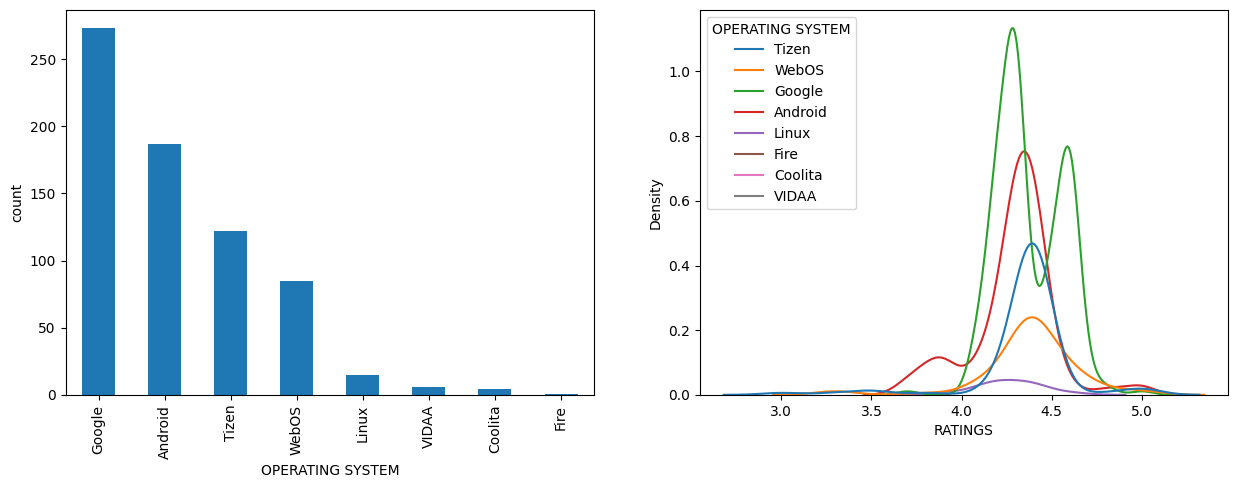

In [5]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ylabel('count')
df['OPERATING SYSTEM'].value_counts().plot(kind = 'bar')
plt.subplot(1,2,2)
sns.kdeplot(data = df, x = 'RATINGS',hue = 'OPERATING SYSTEM')

**`Insights`**  --

* **The Most number of `Ratings` from [4.1 - 4.7]**

* **less Number of Ratings from [3.0 - 3.9]**

* **In this plot highest rating is `5` and the lowest rating is `3`**

* **Most of the `Smart TV ` ratings are `4.3`**

* **There is no Ratings from `3.1` to `3.3`**

* **In this plot `Google` operating system  got more Ratings**

In [195]:
df.columns

Index(['BRAND NAME', 'MODEL NAME(inch)', 'LENGTH(cm)', 'VIDEO QUALITY',
       'PRICE', 'ORIGINAL_PRICE', 'DISCOUNT', 'LAUNCH YEAR',
       'OPERATING SYSTEM', 'RATINGS', 'NO OF RIVEWS', 'NO OF RATINGS'],
      dtype='object')

### Density PLot

* **`To check the  Distribution of the data`**

C:\Users\saiki\AppData\Local\Temp\ipykernel_30444\2272213530.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = df,x = 'RATINGS',hue = 'VIDEO QUALITY')


<Axes: xlabel='RATINGS', ylabel='Density'>

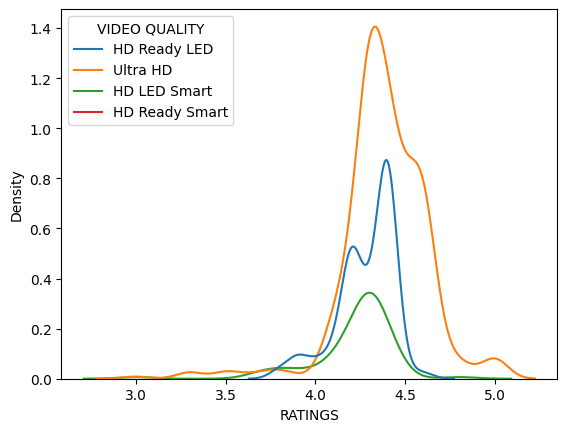

In [50]:
sns.kdeplot(data = df,x = 'RATINGS',hue = 'VIDEO QUALITY')

C:\Users\saiki\AppData\Local\Temp\ipykernel_8928\24224058.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data = df,x = 'RATINGS',kind='kde',col='VIDEO QUALITY')


<Figure size 1200x400 with 0 Axes>

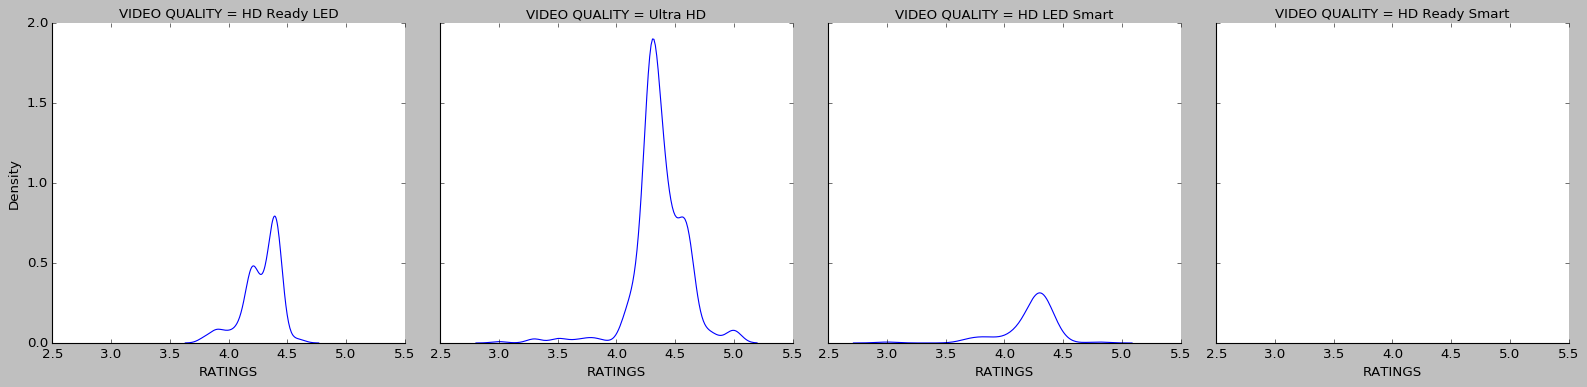

In [405]:
plt.figure(figsize=(15,5))
sns.displot(data = df,x = 'RATINGS',kind='kde',col='VIDEO QUALITY')

**`Insights`**  --

* **In this plot (fig-1) the `HD READY LED` has 4.0 to 4.5 ratings in the `VIDEO QUALITY` of `SMART TV`**

* **In this plot (fig-2) the `ULTRA HD` has 4.0 to 4.8 ratings in the `VIDEO QUALITY` of `SMART TV`**

* **In this plot (fig-3) the `HD LED SMART` has 4.0 to 4.5 ratings in the `VIDEO QUALITY` of `SMART TV`**

* **In this plot (fig-4) the `HD READY SMART` has no ratings in the `VIDEO QUALITY` of `SMART TV`**

### Box Plot

* **`To check the outliers`**

In [388]:
df.columns

Index(['BRAND NAME', 'MODEL NAME(inch)', 'LENGTH(cm)', 'VIDEO QUALITY',
       'PRICE', 'ORIGINAL_PRICE', 'DISCOUNT', 'LAUNCH YEAR',
       'OPERATING SYSTEM', 'RATINGS', 'NO OF RIVEWS', 'NO OF RATINGS'],
      dtype='object')

C:\Users\saiki\AppData\Local\Temp\ipykernel_14420\845504401.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df,x = 'OPERATING SYSTEM',y = 'PRICE',palette='tab10')


<Axes: xlabel='OPERATING SYSTEM', ylabel='PRICE'>

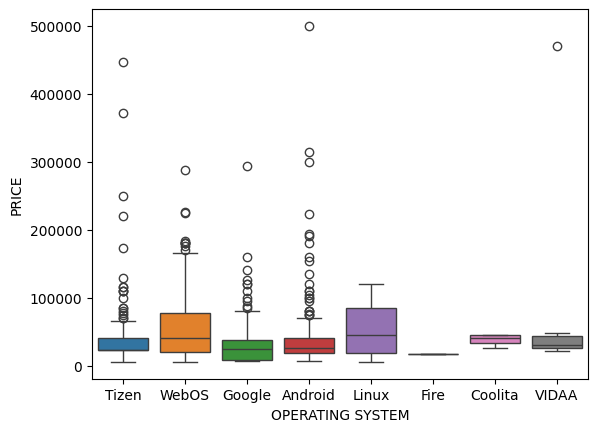

In [48]:
sns.boxplot(data = df,x = 'OPERATING SYSTEM',y = 'PRICE',palette='tab10')

## _Categorical Data_

* Bar Plot
* Count Plot
* Pie Plot

### _Bar plot_

* **`To comapare and Display the frequency,count or proportions`.**

In [322]:
plt.style.use('classic')

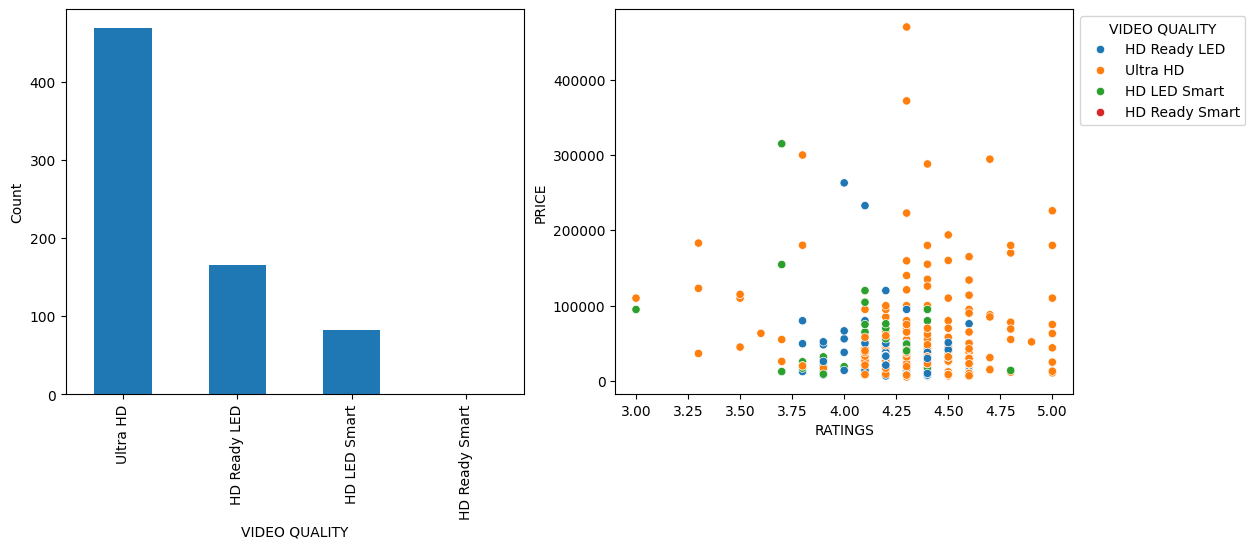

In [177]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.ylabel('Count')
df['VIDEO QUALITY'].value_counts().plot(kind = 'bar')
plt.subplot(1,2,2)
ax = sns.scatterplot(data=df, x='RATINGS', y='PRICE', hue='VIDEO QUALITY')
sns.move_legend(ax, 'upper left',bbox_to_anchor=(1, 1) )

**`Insights`**  --

#### Fig-1

* **Most of the `SMART TV's` are having a  `ULTRA HD` video quality**

* **less number of `HD READY SMART` video quality in `SMART TV'S`**

#### Fig-2

* **`ULTRA HD` is the higest rated Video Quality and most ratings**

* **`ULTRA HD` has 5.0 rating Video Quality and its prices between 10k - 2lakh**

* **In this plot  Smart Tv with Ultra hd(4.3) video quality is more expensive above  4 lakh**

* **`HD READY SMART` has no ratings**

* **`ULTRA HD` ratings [3.0-5.0]**
* **`HD READY SMART` ratings [3.8-4.6]**
* **`HD LED SMART` ratings [3-4.75]**

**`HD READY SMART` ratings [3.8-4.6] and its prices between[10k-2.7lakh]**

**`HD LED SMART` ratings [3.0-4.75] and its prices between[10k-3lakh]**

## _Count Plot_

* **`Counts of Unique Values`**

<Figure size 1500x500 with 0 Axes>

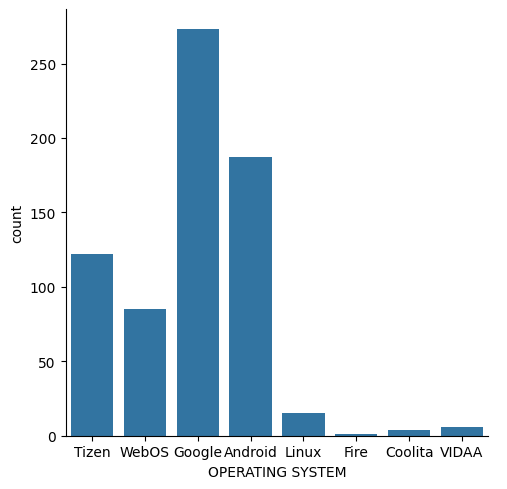

In [6]:
plt.figure(figsize=(15,5))
sns.catplot(data = df,x = 'OPERATING SYSTEM',kind='count')

In [7]:
df.columns

Index(['Unnamed: 0', 'BRAND NAME', 'MODEL NAME(inch)', 'LENGTH(cm)',
       'VIDEO QUALITY', 'PRICE', 'ORIGINAL_PRICE', 'DISCOUNT', 'LAUNCH YEAR',
       'OPERATING SYSTEM', 'RATINGS', 'NO OF RIVEWS', 'NO OF RATINGS'],
      dtype='object')

**`Insights`**  --

* **In this plot , Most of the `SMART TV'S` are having a `GOOGLE` Operating System**

* **`FIRE` operating system had least count**

### _Pie Chart_

* `Percentile of Parts`.

In [291]:
df.columns

Index(['BRAND NAME', 'MODEL NAME(inch)', 'LENGTH(cm)', 'VIDEO QUALITY',
       'PRICE', 'ORIGINAL_PRICE', 'DISCOUNT', 'LAUNCH YEAR',
       'OPERATING SYSTEM', 'RATINGS', 'NO OF RIVEWS', 'NO OF RATINGS'],
      dtype='object')

In [72]:
df['VIDEO QUALITY'].value_counts()

VIDEO QUALITY
Ultra HD          469
HD Ready LED      166
HD LED Smart       82
HD Ready Smart      1
Name: count, dtype: int64

In [95]:
val = [0.1,0.1,0.1,0.1]

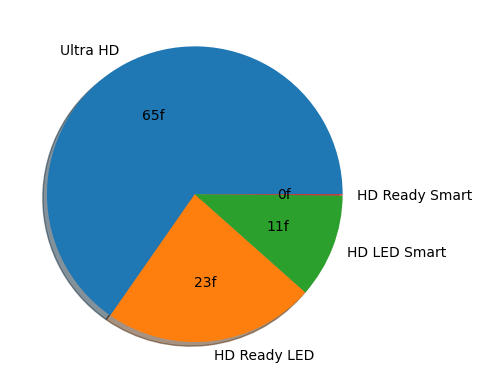

In [210]:
plt.pie(df['VIDEO QUALITY'].value_counts(),labels=['Ultra HD','HD Ready LED','HD LED Smart','HD Ready Smart'],autopct="%.if",shadow=True)
plt.show() 0

**`Insights`**  --

####  **In this Pie Chart,We are showing `VIDEO QUALITY`**

* **65% of Smart tv Video Quality is `ULTRA HD`**

* **23% of Smart tv Video Quality is `HD READY LED`**

* **11% of Smart tv Video Quality is `HD LED SMART`**

* **0% of Smart tv Video Quality is `HD READY SMART`**

## _Bi-Variate Analysis_

### _Categorical vs Categorical_

In [304]:
df.columns

Index(['BRAND NAME', 'MODEL NAME(inch)', 'LENGTH(cm)', 'VIDEO QUALITY',
       'PRICE', 'ORIGINAL_PRICE', 'DISCOUNT', 'LAUNCH YEAR',
       'OPERATING SYSTEM', 'RATINGS', 'NO OF RIVEWS', 'NO OF RATINGS'],
      dtype='object')

### ` _Cross Tab_`

In [154]:
pd.crosstab(df['BRAND NAME'],df['VIDEO QUALITY'],margins=True)

VIDEO QUALITY,HD LED Smart,HD Ready LED,HD Ready Smart,Ultra HD,All
BRAND NAME,,,,,
Acer,2,2,1,13,18
Aiwa,0,0,0,1,1
BPL,1,1,0,0,2
BeethoSOL,0,4,0,0,4
Blaupunkt,5,33,0,60,98
CANDY,1,1,0,1,3
CORNEA,0,0,0,2,2
Candes,0,2,0,1,3
Compaq,3,0,0,2,5


### `_Continous Data vs Continous Data_`

In [306]:
df.columns

Index(['BRAND NAME', 'MODEL NAME(inch)', 'LENGTH(cm)', 'VIDEO QUALITY',
       'PRICE', 'ORIGINAL_PRICE', 'DISCOUNT', 'LAUNCH YEAR',
       'OPERATING SYSTEM', 'RATINGS', 'NO OF RIVEWS', 'NO OF RATINGS'],
      dtype='object')

In [307]:
df['Bra']

,BRAND NAME,MODEL NAME(inch),LENGTH(cm),VIDEO QUALITY,PRICE,ORIGINAL_PRICE,DISCOUNT,LAUNCH YEAR,OPERATING SYSTEM,RATINGS,NO OF RIVEWS,NO OF RATINGS
0,SAMSUNG,32,80.0,HD Ready LED,22999,42999,46,2022,Tizen,4.4,117,31312
1,SAMSUNG,43,108.0,Ultra HD,7790,27990,72,2023,Tizen,4.4,478,93242
2,LG,32,80.0,HD Ready LED,14490,24990,42,2020,WebOS,4.3,827,39424
3,Mi,32,80.0,HD Ready LED,9999,17999,44,2023,Google,4.3,24083,23015
4,Thomson,32,80.0,HD Ready LED,12490,24999,50,2023,Android,4.3,3237,338471
...,...,...,...,...,...,...,...,...,...,...,...,...
715,SONY,55,139.0,Ultra HD,24590,26999,8,2022,Google,4.3,489,23946
716,Blaupunkt,50,126.0,Ultra HD,31999,44999,28,2023,Google,4.5,10715,12400
717,KODAK,55,139.0,Ultra HD,22999,29999,23,2022,Google,4.6,3237,338471
718,SAMSUNG,55,138.0,Ultra HD,36490,54990,33,2021,Tizen,3.3,489,23946


### Scatterplot

* **`Relation between two continous Variables`.**

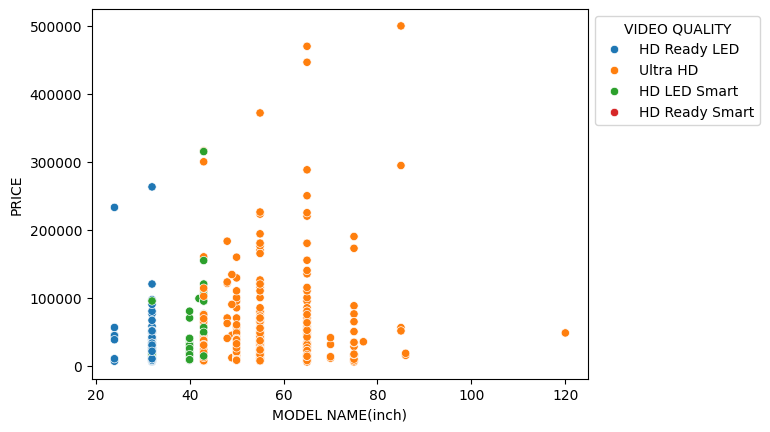

In [161]:
ax = sns.scatterplot(data = df,x = 'MODEL NAME(inch)' ,y = 'PRICE',hue = 'VIDEO QUALITY')
sns.move_legend(ax, 'upper left',bbox_to_anchor=(1, 1) )

**`Insights`**  --

* **The relationship between `PRICE` and `ORIGINAL_PRICE` ---  [`POSITIVELY STRONG RELATIONSHIP`]**

* **if Original_price increses price also increses**

In [309]:
df.columns

Index(['BRAND NAME', 'MODEL NAME(inch)', 'LENGTH(cm)', 'VIDEO QUALITY',
       'PRICE', 'ORIGINAL_PRICE', 'DISCOUNT', 'LAUNCH YEAR',
       'OPERATING SYSTEM', 'RATINGS', 'NO OF RIVEWS', 'NO OF RATINGS'],
      dtype='object')

<Axes: xlabel='OPERATING SYSTEM'>

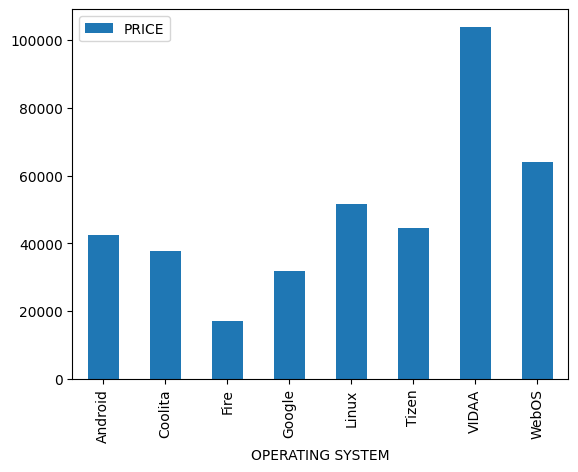

In [138]:

pd.pivot_table(data = df,index='OPERATING SYSTEM',values = 'PRICE',aggfunc='mean').plot(kind = 'bar')

**`Insights`**  --

* **Smart Tv with `VIDAA` operating system is the more expensive around 1 Lakh**

* **Smart Tv with `FIRE` operating system is the lowest price 20k**

### `Categorical vs Numerical`

* bar plot,
* box plot,
* violon,

### BOX-PLOT   :     `Identifying Outliers`

C:\Users\saiki\AppData\Local\Temp\ipykernel_14420\2379704779.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data = df, x = 'VIDEO QUALITY',y = 'RATINGS',kind='box',palette='hls')


<Figure size 1800x800 with 0 Axes>

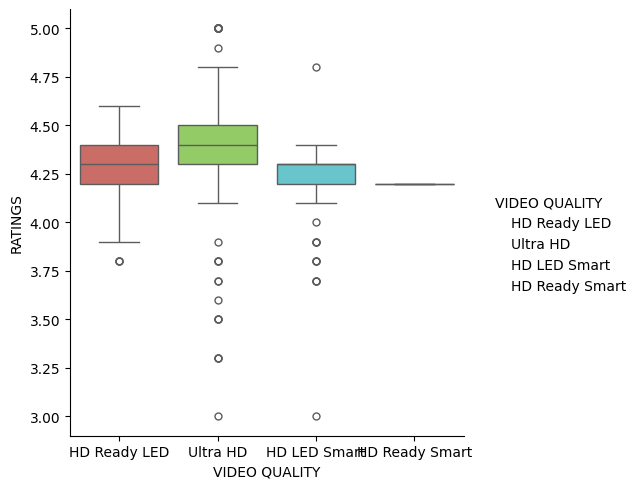

In [113]:
plt.figure(figsize=(18,8))
sns.catplot(data = df, x = 'VIDEO QUALITY',y = 'RATINGS',kind='box',palette='hls')

* **The middle portion represents the `Inter-quartile-range(IQR)`**
* **Middle line represents the `median` of the data**
* **circles represents the `outliers`**

* **Lower limit of `HD READY LED` is around `3.8` and upper limit of `HD READY LED` is around `4.6`.**

* **Lower limit of `ULTRA HD` is around `4.1` and upper limit of `ULTRA HD` is around `4.8`.**

* **Lower limit of `HD LED SMART` is around `4.1` and upper limit of `HD LED SMART` is around `4.4`.**

### BAR-PLOT   : `Bar plots are primarily used to compare different categories`

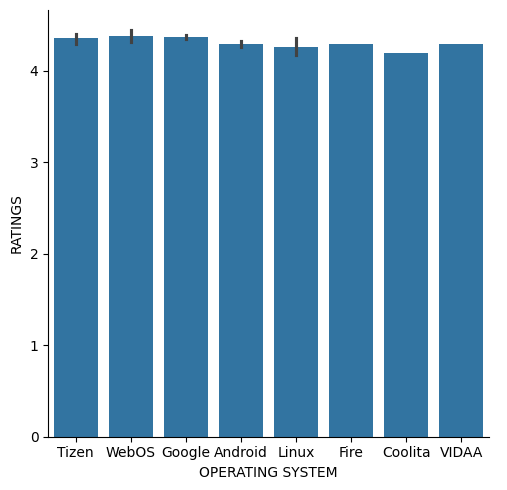

In [40]:
sns.catplot(data = df , x = 'OPERATING SYSTEM',y = 'RATINGS',kind='bar')

<Figure size 1500x1000 with 0 Axes>

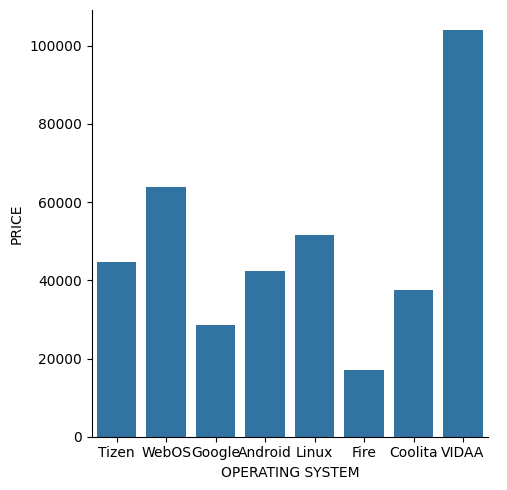

In [160]:
plt.figure(figsize=(15,10))

sns.catplot(data = df , x = 'OPERATING SYSTEM',y = 'PRICE',kind='bar', errorbar=None)


**`Insights`**  --

* **here we are comparing `OPERATING SYSTEM`(Categorical data) and `PRICE`(Continous data).**

* **In this plot shows the most expensive operating system is `VIDAA` and its price is around 1 lakh**

* **Lowest price of operating stsyem is `FIRE`**

## _Multi-Variate Analysis_

* Heat Map
* Pair Plot

### Heat-Map

* **`Quantifies and display Relation between multiple variables`**

In [379]:
df.corr(numeric_only=True)

,MODEL NAME(inch),LENGTH(cm),PRICE,ORIGINAL_PRICE,DISCOUNT,LAUNCH YEAR,RATINGS,NO OF RIVEWS,NO OF RATINGS
MODEL NAME(inch),1.000000,0.999415,0.223720,0.215319,-0.090902,-0.123134,0.139068,-0.182921,-0.141057
LENGTH(cm),0.999415,1.000000,0.222240,0.214132,-0.090855,-0.124487,0.138549,-0.183533,-0.141108
PRICE,0.223720,0.222240,1.000000,0.944730,-0.228385,-0.168117,-0.111526,-0.127046,-0.115238
ORIGINAL_PRICE,0.215319,0.214132,0.944730,1.000000,-0.051217,-0.149812,-0.136599,-0.154238,-0.131604
DISCOUNT,-0.090902,-0.090855,-0.228385,-0.051217,1.000000,0.076598,-0.003157,-0.218755,-0.155122
LAUNCH YEAR,-0.123134,-0.124487,-0.168117,-0.149812,0.076598,1.000000,-0.003068,0.154748,0.086511
RATINGS,0.139068,0.138549,-0.111526,-0.136599,-0.003157,-0.003068,1.000000,-0.016372,-0.065723
NO OF RIVEWS,-0.182921,-0.183533,-0.127046,-0.154238,-0.218755,0.154748,-0.016372,1.000000,0.158991
NO OF RATINGS,-0.141057,-0.141108,-0.115238,-0.131604,-0.155122,0.086511,-0.065723,0.158991,1.000000


<Axes: >

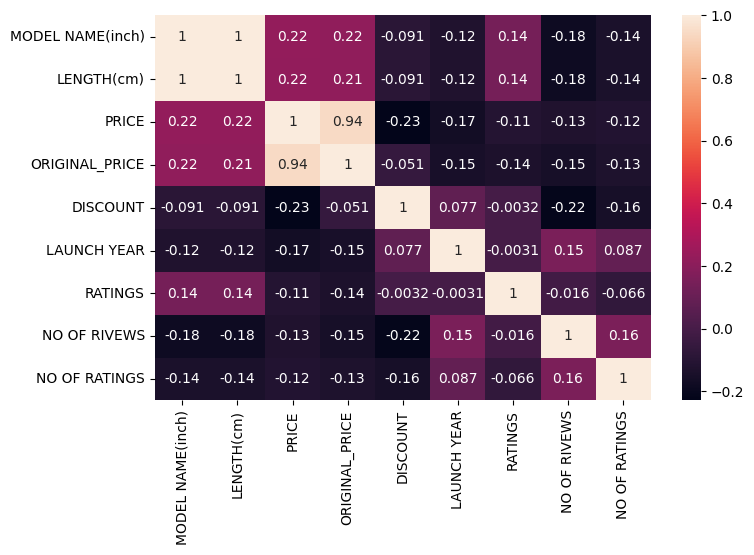

In [316]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True),annot=True)

**`Insights`**  --

* **The relationship between `PRICE` and `MODEL NAME(inch)` Positive weak relationship.**

* **if `MODEL NAME(inch)` increses automatically `PRICE` also increases.**`

* **The Realationship between `PRICE` and `DISCOUNT` Negative weak Relationship.**

* **if `DISCOUNT` increses Automatically `PRICE` will be Decreses.**

* **The Relationship Between `MODEL NAME` and `RATINGS` positive weak relationship.**

* **If we gave good ratings on that model or brand obviously brand sales are increses.**

###  **_`correlation plot`_**

<Axes: >

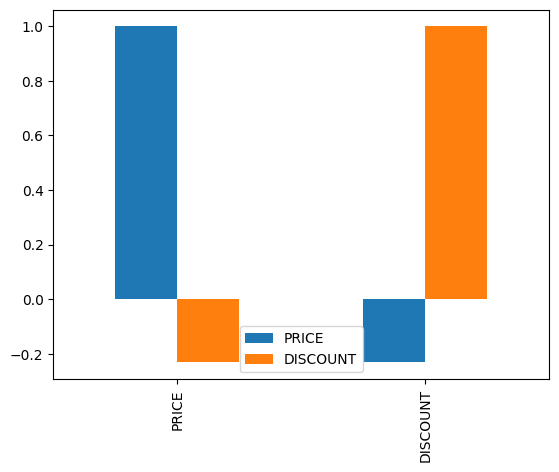

In [139]:
df[['PRICE','DISCOUNT']].corr().plot(kind = 'bar')

#### Inversily proportional

* **If Discount Decreses price will be increses.**
* **If Discount increses price will be Decreses**

### _By using Groupby_

* **groupby() function is used to split the data into groups based on some criteria.**

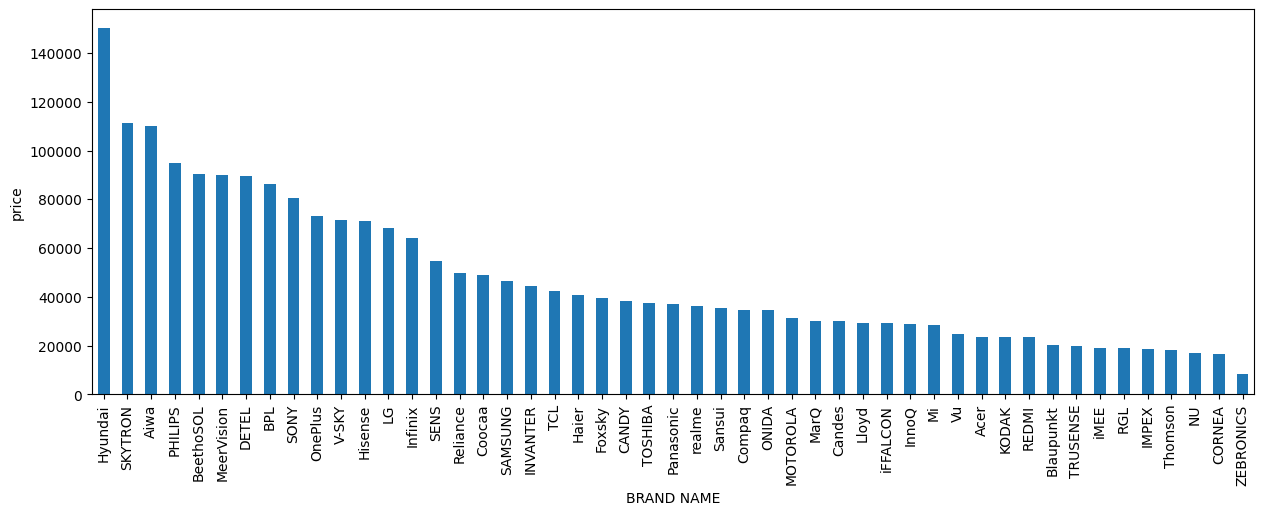

In [56]:
plt.figure(figsize=(15,5))
plt.ylabel('price')
df.groupby(by = ['BRAND NAME'])['PRICE'].mean().sort_values(ascending= False).plot(kind='bar')
plt.show()

* **In this plot the average prices of each and every brand.**


* **Only one brand more then 14k average price.**
* **Remaining all brands are less than 12k**

<Axes: xlabel='VIDEO QUALITY'>

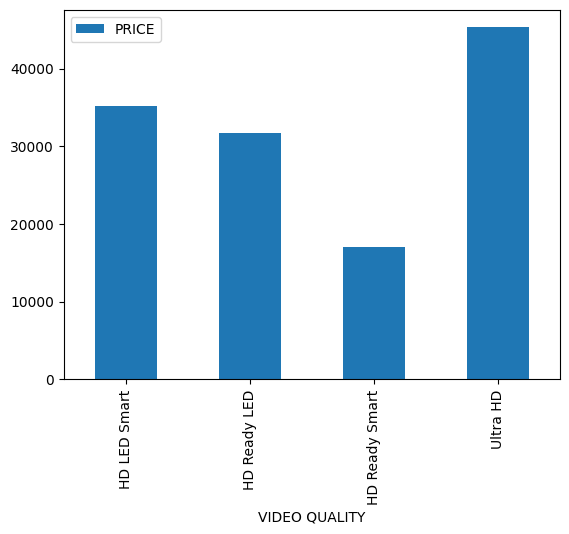

In [48]:
pd.pivot_table(data = df,index='VIDEO QUALITY',values = 'PRICE',aggfunc='mean').plot(kind = 'bar')

In [47]:
df.columns

Index(['Unnamed: 0', 'BRAND NAME', 'MODEL NAME(inch)', 'LENGTH(cm)',
       'VIDEO QUALITY', 'PRICE', 'ORIGINAL_PRICE', 'DISCOUNT', 'LAUNCH YEAR',
       'OPERATING SYSTEM', 'RATINGS', 'NO OF RIVEWS', 'NO OF RATINGS'],
      dtype='object')

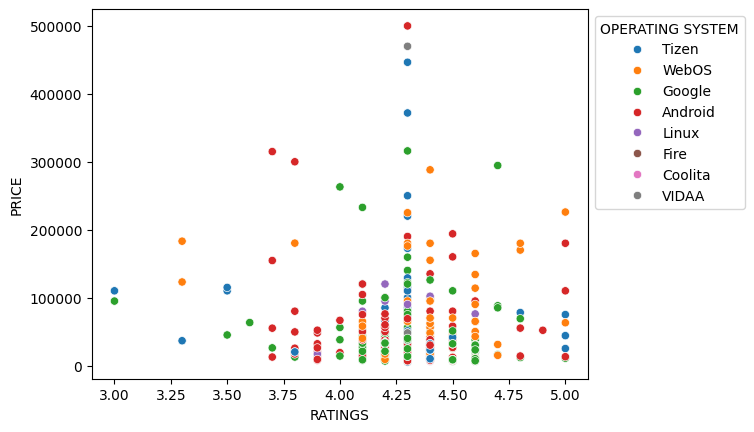

In [134]:
ax = sns.scatterplot(data=df, x='RATINGS', y='PRICE', hue='OPERATING SYSTEM')
sns.move_legend(ax, 'upper left',bbox_to_anchor=(1, 1) )

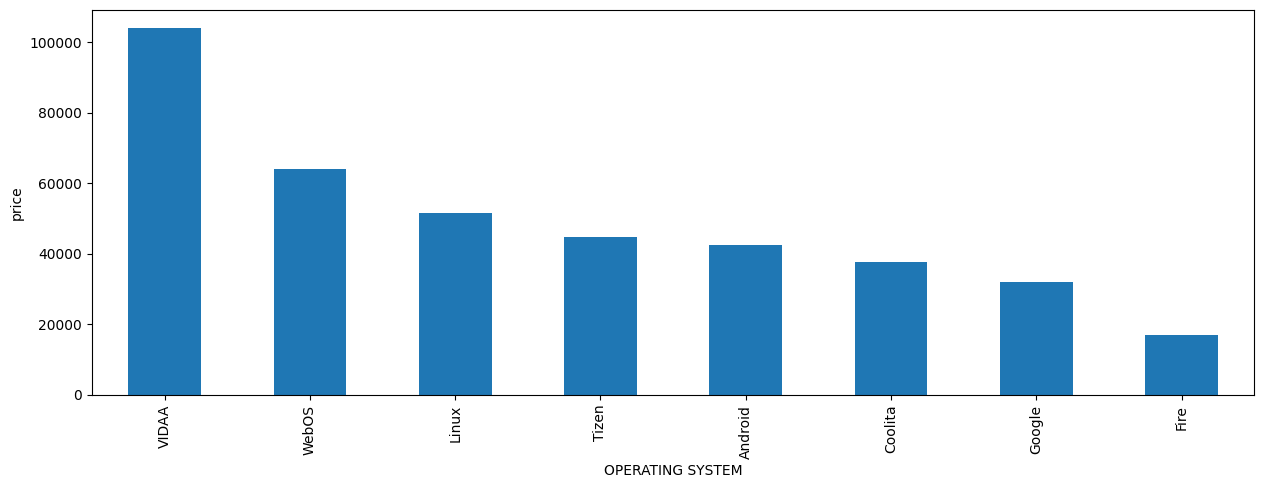

In [141]:
plt.figure(figsize=(15,5))
plt.ylabel('price')
df.groupby(by = ['OPERATING SYSTEM'])['PRICE'].mean().sort_values(ascending= False).plot(kind='bar')
plt.show()

In [154]:
df

,BRAND NAME,MODEL NAME(inch),LENGTH(cm),VIDEO QUALITY,PRICE,ORIGINAL_PRICE,DISCOUNT,LAUNCH YEAR,OPERATING SYSTEM,RATINGS,NO OF RIVEWS,NO OF RATINGS
0,SAMSUNG,32,80.0,HD Ready LED,22999,42999,46,2022,Tizen,4.4,117,31312
1,SAMSUNG,43,108.0,Ultra HD,7790,27990,72,2023,Tizen,4.4,478,93242
2,LG,32,80.0,HD Ready LED,14490,24990,42,2020,WebOS,4.3,827,39424
3,Mi,32,80.0,HD Ready LED,9999,17999,44,2023,Google,4.3,24083,23015
4,Thomson,32,80.0,HD Ready LED,12490,24999,50,2023,Android,4.3,3237,338471
...,...,...,...,...,...,...,...,...,...,...,...,...
715,SONY,55,139.0,Ultra HD,24590,26999,8,2022,Google,4.3,489,23946
716,Blaupunkt,50,126.0,Ultra HD,31999,44999,28,2023,Google,4.5,10715,12400
717,KODAK,55,139.0,Ultra HD,22999,29999,23,2022,Google,4.6,3237,338471
718,SAMSUNG,55,138.0,Ultra HD,36490,54990,33,2021,Tizen,3.3,489,23946


   ###                                           `_WEB SCRAPING AND EDA PROJECT_`

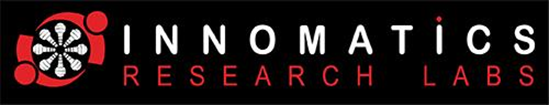